# Example application of tool

Let's apply the tool to a set of variants from a cancer cell line.

Dataset is from [Talsania et. al. 2022](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02816-6). These are structural variants called using the [Manta pipeline](https://github.com/Illumina/manta) on WGS data from Illumina in HCC1395 tumor cells.

In [15]:
import pandas as pd
import numpy as np 
import os
from pathlib import Path

# Get input variants

In [16]:
# Get variants

ftp_path = 'https://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/seqc/Somatic_Mutation_WG/analysis/SVs/VCFs/tumor.illumina.manta.EA_T_1.vcf.gz'
data_file = 'test_data/example_application/'
in_file = f'{data_file}tumor.illumina.manta.EA_T_1.vcf'

if not Path(f'../{in_file}').is_file():
    os.system(f'wget -P ../test/ {ftp_path}')
    os.system(f'gupzip ../{in_file}.gz')


In [17]:
# Read input

import sys
sys.path.insert(0, '../scripts')

import reading_utils
reading_utils.var_set_size = 2000

variants = reading_utils.read_input(f'../{in_file}', 0)
variants

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN
0,chr1,1117831,NaN,C,[chr22:20272153[C,BND,NaN
1,chr1,1119512,NaN,A,ACAGTGC]chr22:20302979],BND,NaN
2,chr1,3721048,3734333,T,<DUP:TANDEM>,DUP,13285
3,chr1,6742482,NaN,C,C[chr12:96100887[,BND,NaN
4,chr1,9357666,9377061,G,<DEL>,DEL,-19395
...,...,...,...,...,...,...,...
1543,chrY,14531089,NaN,T,T[chrX:6219006[,BND,NaN
1544,chrY,14533586,NaN,A,A]chrX:6219008],BND,NaN
1545,chr16_KI270728v1_random,1769992,NaN,A,A[chr9:129442980[,BND,NaN
1546,chr17_KI270729v1_random,162446,162616,GAGTCCATTCGATGATTTCATTAGATTCCATTGGAAGATGATTCCA...,G,DEL,-170


In [18]:
# Look at varinat types present
variants.SVTYPE.value_counts()

BND    622
DEL    552
DUP    294
INS     80
Name: SVTYPE, dtype: int64

# Score variants using tool

In [5]:
# Get run command

file = 'tumor'#'CTCF_del' # Output files prefix
directory = f'{data_file}tumor_output'# '../test/output' # Output directory

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file,
      '--file', file, # File name prefix for outputs
      '--dir', directory, # Path to save output in 
      '--augment', # Get the average augmented scores
      '--get_Akita_scores') # Get disruption scores


Run this command in the main directory:

python scripts/SuPreMo.py test_data/example_application/tumor.illumina.manta.EA_T_1.vcf --file tumor --dir test_data/example_application/tumor_output --augment --get_Akita_scores


In [6]:
# Get path to output files
out_file = os.path.join(directory, file)

## Get and plot scores 

In [19]:
# Read scores output

scores = pd.read_csv(f'../{out_file}_scores', sep = '\t')
scores.iloc[:10,:10]

,var_index,mse_mean,mse_median,corr_mean,corr_median
0,0,0.012430,0.013497,0.987010,0.986963
1,1,0.016944,0.015666,0.962769,0.963575
2,2,0.024681,0.023323,0.955341,0.952729
3,3,0.005796,0.005779,0.989258,0.989808
4,4,0.015164,0.014363,0.973157,0.973809
5,5,NaN,NaN,NaN,NaN
6,6,0.009546,0.009554,0.974135,0.974083
7,7,0.009095,0.006304,0.964207,0.967643
8,8,0.012784,0.013122,0.964684,0.968206
9,9,0.012619,0.012187,0.946906,0.947135


In [20]:
# Add scores dataframe to input dataframe to match them with information about the perturbations

scores = pd.concat([variants, scores], axis = 1)
scores.iloc[:10,:10]

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN,var_index,mse_mean,mse_median
0,chr1,1117831,NaN,C,[chr22:20272153[C,BND,NaN,0,0.012430,0.013497
1,chr1,1119512,NaN,A,ACAGTGC]chr22:20302979],BND,NaN,1,0.016944,0.015666
2,chr1,3721048,3734333,T,<DUP:TANDEM>,DUP,13285,2,0.024681,0.023323
3,chr1,6742482,NaN,C,C[chr12:96100887[,BND,NaN,3,0.005796,0.005779
4,chr1,9357666,9377061,G,<DEL>,DEL,-19395,4,0.015164,0.014363
5,chr1,9495567,36665592,T,<DUP:TANDEM>,DUP,27170025,5,NaN,NaN
6,chr1,13349505,NaN,A,A]chr8:101508951],BND,NaN,6,0.009546,0.009554
7,chr1,13931876,13932299,TGCCCAGGCTGGAGTGCAGTGGCACGATCTTGGCTCACTGCAACCT...,T,DEL,-423,7,0.009095,0.006304
8,chr1,17393975,17394067,GATGAGATGGCCTTCTGCTACACCCAGGCTCCCCACAAGACAACGT...,G,DEL,-92,8,0.012784,0.013122
9,chr1,18359587,NaN,A,A]chr6:163603712],BND,NaN,9,0.012619,0.012187


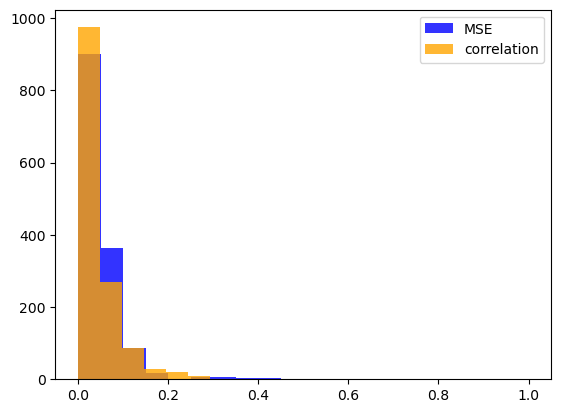

In [10]:
# Plot the disrtribution of disruption scores

from cooltools.lib.plotting import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import normalize
import math

norm_scores = {}
for method in ['mse', 'corr']:
    norm_scores[method] = normalize([scores.loc[~np.isnan(scores[f'{method}_mean']),
                                                f'{method}_mean']], 
                                    norm='max')[0]
    
def get_n_bins(data, bin_size):
    return math.ceil((max(data) - min(data)) / bin_size)


plt.hist(norm_scores['mse'], color = 'blue', alpha = 0.8, label = 'MSE',
         bins = get_n_bins(norm_scores['mse'], 0.05))
plt.hist(1 - norm_scores['corr'], color = 'orange', alpha = 0.8,  label = 'correlation',
         bins = get_n_bins(norm_scores['corr'], 0.05))
plt.legend(loc="upper right")
plt.show()

In [11]:
# Plotting help

def get_n_bins(data, bin_size):
    return math.ceil((max(data) - min(data)) / bin_size)

alpha = 0.5
colors = {'DEL':'blue',
          'DUP':'red',
          'BND':'green',
          'INS':'pink'}
top_n = 2

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


BND 0.0647677165134706
DEL 0.0960887347565359
DUP 0.0948755321562838
INS 0.0220109722913781


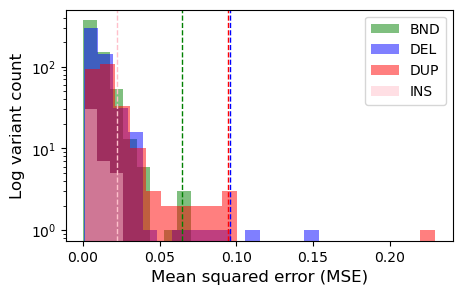

In [12]:
# Plot disruption scores by variant type

method = 'mse_mean'
data = scores[~np.isnan(scores[method])]

plt.figure(figsize=(5,3))

for SVTYPE in np.unique(scores.SVTYPE):
    plt.hist(data.loc[data.SVTYPE == SVTYPE, method], color = colors[SVTYPE], alpha = alpha, label = SVTYPE,
             bins = get_n_bins(data.loc[data.SVTYPE == SVTYPE, method], 0.01))
    plt.axvline(x = data.loc[data.SVTYPE == SVTYPE, method].sort_values(ascending = False).iloc[top_n], 
                color = colors[SVTYPE], linestyle = 'dashed', linewidth = 1)
    print(SVTYPE, data.loc[data.SVTYPE == SVTYPE, method].sort_values(ascending = False).iloc[top_n])
plt.yscale('log')
plt.legend(loc = 'upper right', fontsize = 10)
plt.xlabel('Mean squared error (MSE)', fontname = 'Helvetica', size = 12)
plt.ylabel('Log variant count', fontname = 'Helvetica', size = 12)
plt.show()

BND 0.25043742320378626
DEL 0.37722786212994797
DUP 0.2660918675919858
INS 0.1265577212590825


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

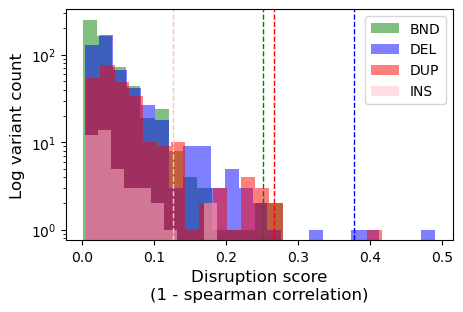

In [28]:
# Plot disruption scores by variant type

method = 'corr_mean'
data = scores[~np.isnan(scores[method])]

plt.figure(figsize=(5,3))

for SVTYPE in np.unique(scores.SVTYPE):
    plt.hist(1 - data.loc[data.SVTYPE == SVTYPE, method], color = colors[SVTYPE], alpha = alpha, label = SVTYPE,
             bins = get_n_bins(data.loc[data.SVTYPE == SVTYPE, method], 0.02))
    plt.axvline(x = 1 - data.loc[data.SVTYPE == SVTYPE, method].sort_values().iloc[top_n], 
                color = colors[SVTYPE], linestyle = 'dashed', linewidth = 1)
    print(SVTYPE, 1 - data.loc[data.SVTYPE == SVTYPE, method].sort_values().iloc[top_n])
plt.yscale('log')
plt.legend(loc = 'upper right', fontsize = 10)
plt.xlabel('Disruption score\n(1 - spearman correlation)', name = 'Helvetica', size = 12)
plt.ylabel('Log variant count', name = 'Helvetica', size = 12)
plt.show()

In [ ]:
savefig('example_application', dpi=1000, format='pdf', metadata='pdf',
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

Looks like deletions and duplications are the most disruptive

# Prioritize most disruptive variants

In [45]:
# Get top 3 most disruptive variants 

top_variants = []

for method in ['mse_mean', 'corr_mean']:
    
    for SVTYPE in [x for x in scores.SVTYPE.unique() if x is not np.nan]:

        top_var = list(scores[(scores.SVTYPE == SVTYPE) & (~np.isnan(scores[method]))]
                            .sort_values(method, ascending = False)
                            .head(3)
                            .index
                            .values)

        for var in top_var:
            top_variants.append(var)
        
top_variants[:10]

[932, 1311, 1011, 829, 64, 549, 25, 894, 1355, 439]

In [46]:
variants_top = variants[[x in top_variants for x in variants.index]]

in_file_top = f'{data_file}tumor.illumina.manta.EA_T_1_top.txt'
variants_top['var_index'] = variants_top.index

# variants_top.to_csv(f'../{in_file_top}', sep = '\t', index = False)

/pollard/home/ketringjoni/miniconda3/envs/CBTN_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Get maps for top scoring variants using tool

In [7]:
in_file_top = f'{data_file}tumor.illumina.manta.EA_T_1_top.txt'

variants_top = pd.read_csv(f'../{in_file_top}', sep = '\t')
variants_top[:10]

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN,var_index
0,chr1,58064887,58560456.0,T,<DEL>,DEL,-495569.0,25
1,chr1,149799777,150031617.0,G,<DUP:TANDEM>,DUP,231840.0,64
2,chr6,1233843,1233907.0,A,<DUP:TANDEM>,DUP,64.0,397
3,chr6,1233870,1233870.0,A,AGAGGAGGCTGTCGGGGGACCGGGAGGACCTCGCCTGCTGTCCATG...,INS,64.0,398
4,chr6,4259990,4260069.0,A,<DUP:TANDEM>,DUP,79.0,403
5,chr6,17874942,17874942.0,T,TAATTCATTCCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAG...,INS,323.0,421
6,chr6,23978115,23978115.0,G,GAAAAATGACAACCAGGCCGGGTGCGGTGGCTCACGCCTGTAATCC...,INS,323.0,439
7,chr6,72060264,72637247.0,C,<DUP:TANDEM>,DUP,576983.0,549
8,chr6,168695904,168696064.0,GCCATTCAGATCATATTTCATGGAGGCCAGGTGTGCTGTGGAATGT...,G,DEL,-160.0,607
9,chr8,19667096,NaN,A,A[chrX:129294293[,BND,NaN,711


In [8]:
# Get run command

file_top = 'tumor_top'# Output files prefix
directory_top = f'{data_file}tumor_output'# Output directory

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file_top,
      '--file', file_top, # File name prefix for outputs
      '--dir', directory_top, # Path to save output in 
      '--augment', # Get the average augmented scores
      '--get_Akita_scores', # Get disruption scores
      '--get_maps', # Get predicted contact frequency maps
      '--get_tracks') # Get disruption tracks


Run this command in the main directory:

python scripts/SuPreMo.py test_data/example_application/tumor.illumina.manta.EA_T_1_top.txt --file tumor_top --dir test_data/example_application/tumor_output --augment --get_Akita_scores --get_maps --get_tracks


In [9]:
# Get path to output files
out_file_top = os.path.join(directory_top, file_top)

## Plot maps for top scoring variants

In [ ]:
import sys
sys.path.insert(0, '../scripts')

import math
import plotting_utils

In [11]:
# Read in maps and disruption tracks
maps = np.load(f'../{out_file_top}_maps.npy', allow_pickle="TRUE").item()
tracks = np.load(f'../{out_file_top}_tracks.npy', allow_pickle="TRUE").item()

In [12]:
list(maps.keys())[:10]

['0_-1',
 '0_0',
 '0_0_revcomp',
 '0_1',
 '1_-1',
 '1_0',
 '1_0_revcomp',
 '1_1',
 '2_-1',
 '2_0']

In [13]:
list(tracks.keys())[:10]

['0_mse_track_-1',
 '0_corr_track_-1',
 '0_mse_track_0',
 '0_corr_track_0',
 '0_mse_track_0_revcomp',
 '0_corr_track_0_revcomp',
 '0_mse_track_1',
 '0_corr_track_1',
 '1_mse_track_-1',
 '1_corr_track_-1']

In [17]:
# Read scores output

scores_top = pd.read_csv(f'../{out_file_top}_scores', sep = '\t').drop('var_index', axis = 1)
scores_top = pd.concat([variants_top, scores_top], axis = 1)
scores_top.iloc[:,:10]

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN,var_index,mse_mean,mse_median
0,chr1,58064887,58560456.0,T,<DEL>,DEL,-495569.0,25,0.153837,0.160266
1,chr1,149799777,150031617.0,G,<DUP:TANDEM>,DUP,231840.0,64,0.095290,0.086250
2,chr6,1233843,1233907.0,A,<DUP:TANDEM>,DUP,64.0,397,0.002974,0.003217
3,chr6,1233870,1233870.0,A,AGAGGAGGCTGTCGGGGGACCGGGAGGACCTCGCCTGCTGTCCATG...,INS,64.0,398,0.001753,0.001640
4,chr6,4259990,4260069.0,A,<DUP:TANDEM>,DUP,79.0,403,0.002412,0.001846
5,chr6,17874942,17874942.0,T,TAATTCATTCCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAG...,INS,323.0,421,0.025725,0.022633
6,chr6,23978115,23978115.0,G,GAAAAATGACAACCAGGCCGGGTGCGGTGGCTCACGCCTGTAATCC...,INS,323.0,439,0.025957,0.011932
7,chr6,72060264,72637247.0,C,<DUP:TANDEM>,DUP,576983.0,549,0.094876,0.089550
8,chr6,168695904,168696064.0,GCCATTCAGATCATATTTCATGGAGGCCAGGTGTGCTGTGGAATGT...,G,DEL,-160.0,607,0.002737,0.002785
9,chr8,19667096,NaN,A,A[chrX:129294293[,BND,NaN,711,0.001475,0.000923


In [ ]:
# Plot all maps

shift = 0
revcomp = ''
method = 'corr'

for i in range(len(variants_top)): 

    var_index = variants_top.iloc[i].var_index

    map_id = f'{i}_{shift}{revcomp}'
    track_id = f'{i}_{method}_track_{shift}{revcomp}'

    if map_id in maps.keys():
        maps_i = maps[map_id][:2]
        rel_pos_map, map_start_coord = maps[map_id][2:]
        disruption_track = tracks[track_id]

        CHR = scores_top[scores_top.var_index == var_index].CHROM.values[0]

        if 'SVLEN' in variants_top.columns:
            SVLEN = variants_top.iloc[i].SVLEN
            SVTYPE = variants_top.iloc[i].SVTYPE
        else:
            SVTYPE, SVLEN = '-', '-'

        if SVTYPE != "DUP":
            genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord[0], rel_pos_map[0], SVTYPE, SVLEN)
        else:
            # For duplications, we want to plot genes that correspond to the masked REF matrix
            genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord[1], rel_pos_map[1], SVTYPE, SVLEN)
        
        gene_rows = round(len(genes_in_map)/3)
        if gene_rows == 0:
            gene_rows += 1

        lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

        print(var_index, SVTYPE)
        plotting_utils.plot_maps_genes_tracks(maps_i, genes_in_map, lines, disruption_track, gene_rows = gene_rows)
        
        
        

25 DEL


From the maps above, the following variants seem to result in the most interesting changes per type:

DEL: 894

DUP: 64 

BND: 1011 

INS: 439

In [ ]:
# Supplemental figure 2

shift = 0
revcomp = ''
method = 'corr'

for ii in [894,64,1011,439]:

    # Plot maps for the top scoring variants
    i = variants_top[variants_top.var_index == ii].index[0]

    var_index = variants_top.iloc[i].var_index

    map_id = f'{i}_{shift}{revcomp}'
    track_id = f'{i}_{method}_track_{shift}{revcomp}'

    if map_id in maps.keys():
        maps_i = maps[map_id][:2]
        rel_pos_map, map_start_coord = maps[map_id][2:]
        disruption_track = tracks[track_id]

        CHR = scores_top[scores_top.var_index == var_index].CHROM.values[0]

        if 'SVLEN' in variants_top.columns:
            SVLEN = variants_top.iloc[i].SVLEN
            SVTYPE = variants_top.iloc[i].SVTYPE
        else:
            SVTYPE, SVLEN = '-', '-'

        if SVTYPE != "DUP":
            genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord[0], rel_pos_map[0], SVTYPE, SVLEN)
        else:
            # For duplications, we want to plot genes that correspond to the masked REF matrix
            genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord[1], rel_pos_map[1], SVTYPE, SVLEN)

        lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

        print(var_index, SVTYPE)
        plotting_utils.plot_maps_genes_tracks_nonames(maps_i, genes_in_map, lines, disruption_track)
        
        

894 DEL


894 DEL -1


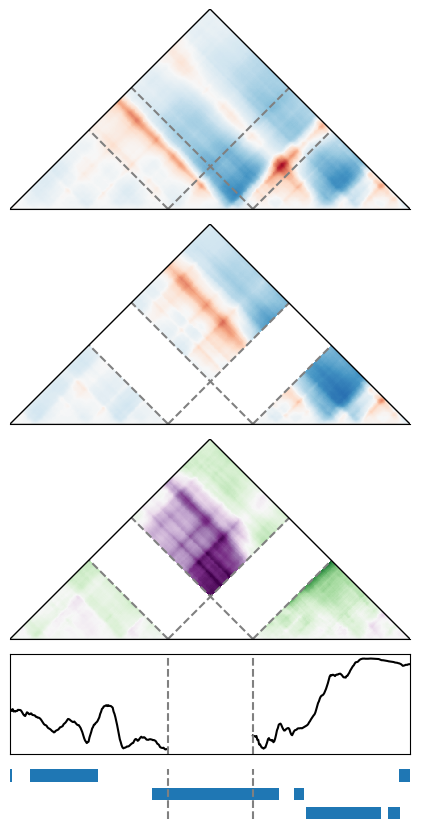

894 DEL 0


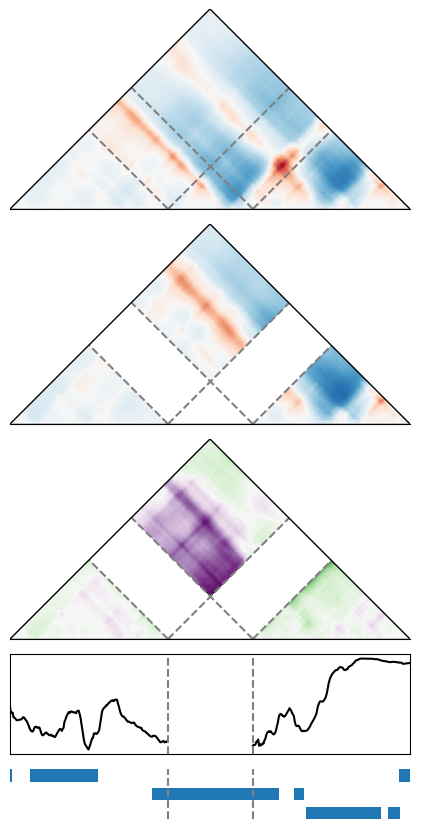

894 DEL 1


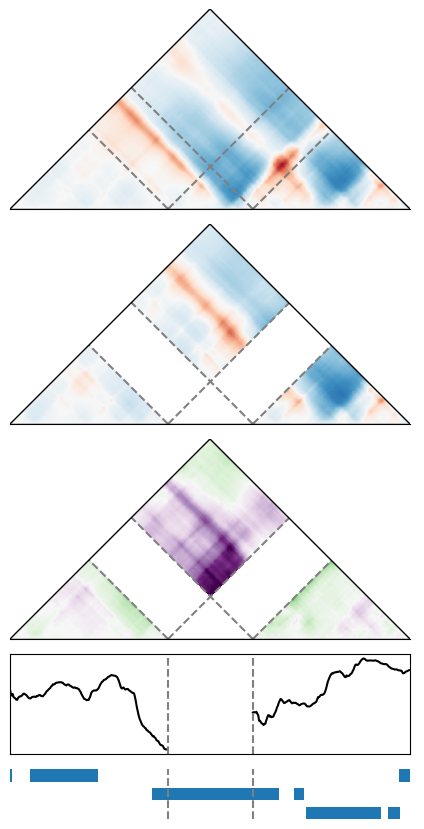

64 DUP -1


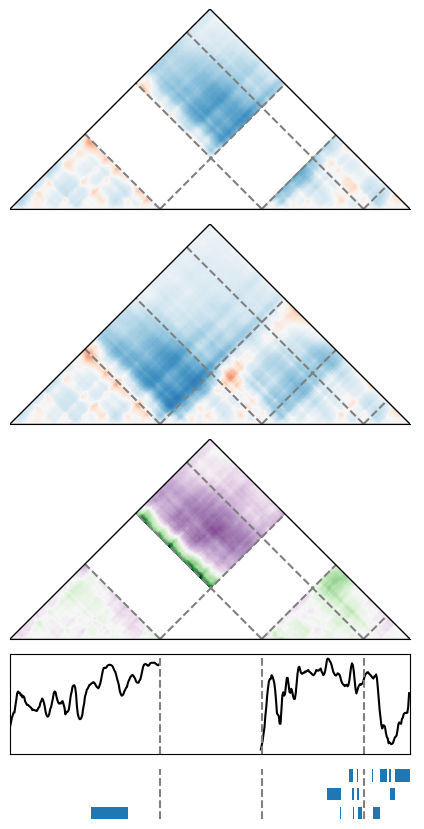

64 DUP 0


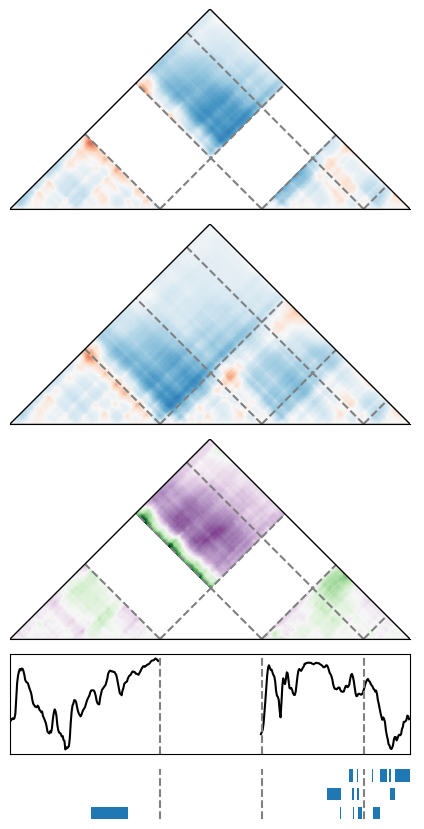

64 DUP 1


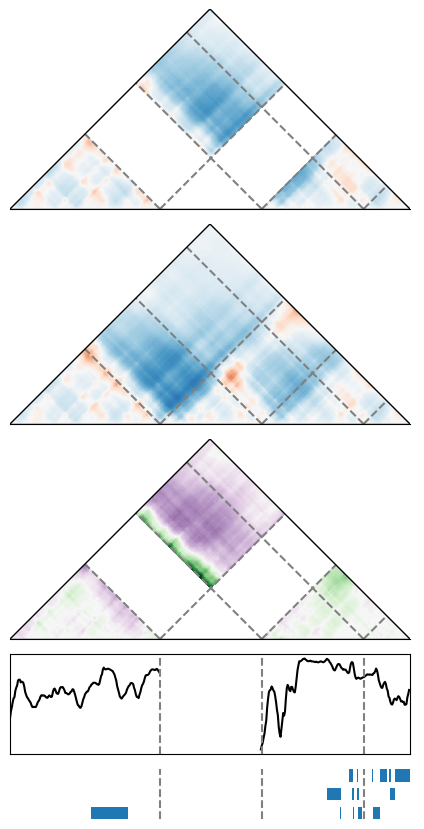

1011 BND -1


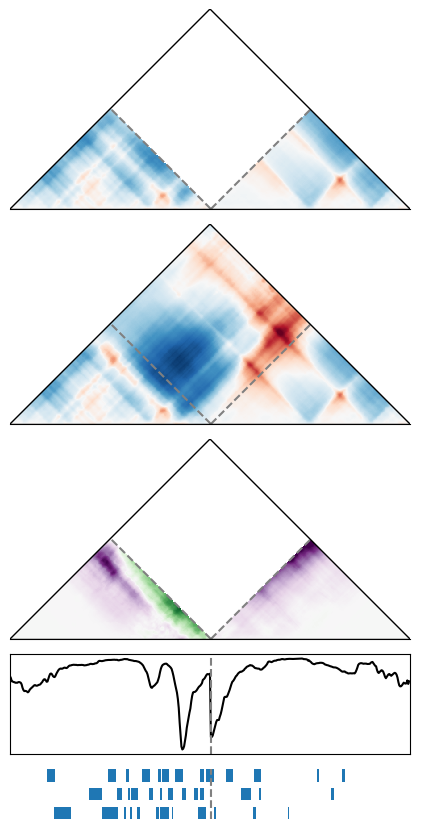

1011 BND 0


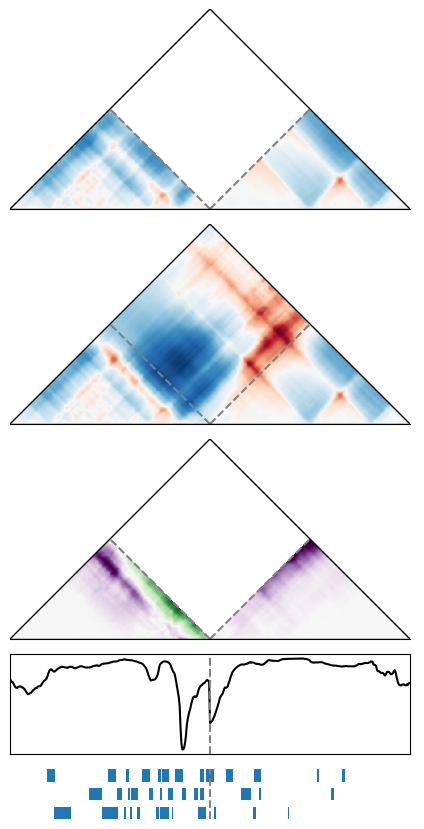

1011 BND 1


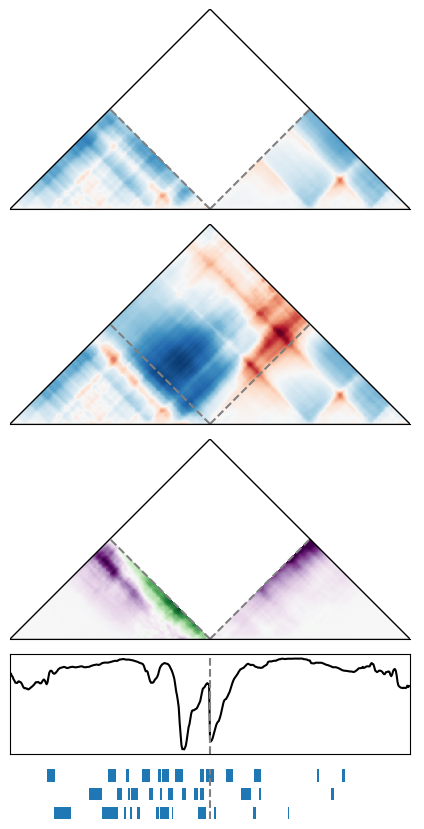

439 INS -1


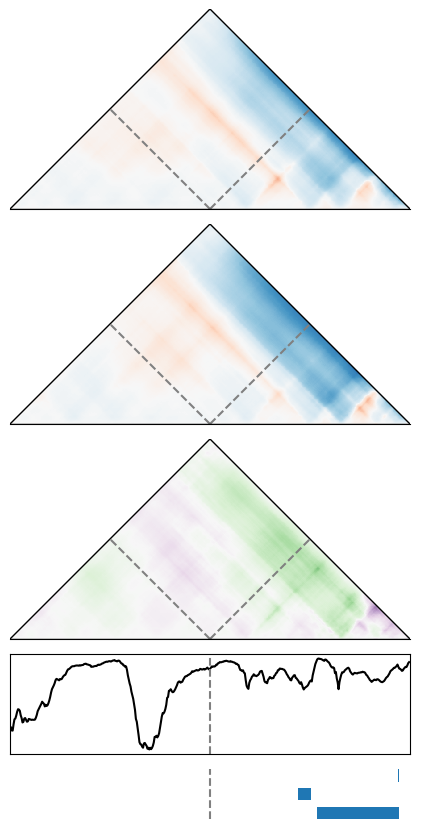

439 INS 0


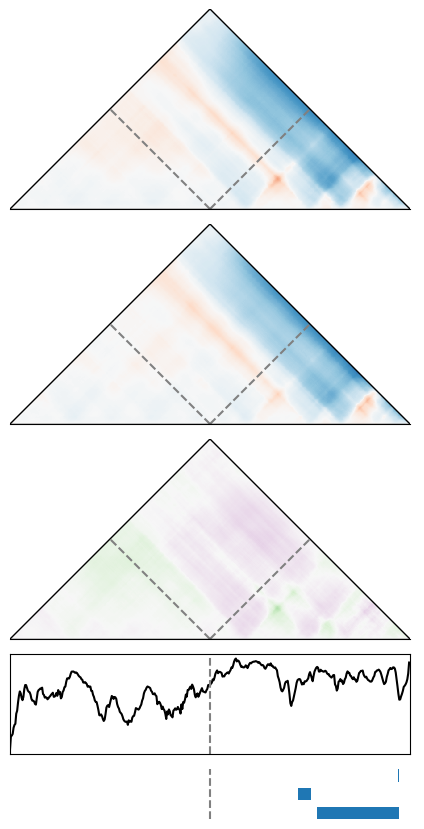

439 INS 1


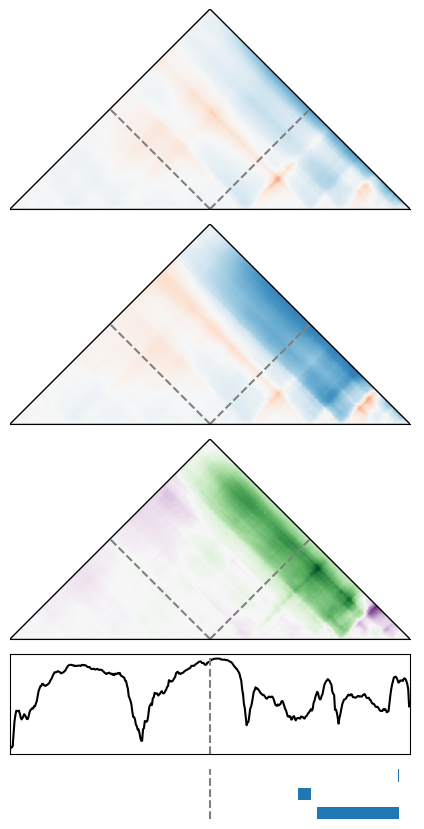

In [20]:
# Check that the shifted maps look similarly changed

# Supplemental figure 

shift = 0
revcomp = ''
method = 'corr'

for ii in [894,64,1011,439]:

    # Plot maps for the top scoring variants
    i = variants_top[variants_top.var_index == ii].index[0]

    var_index = variants_top.iloc[i].var_index

    for shift in [-1,0,1]:
        map_id = f'{i}_{shift}{revcomp}'
        track_id = f'{i}_{method}_track_{shift}{revcomp}'

        if map_id in maps.keys():
            maps_i = maps[map_id][:2]

            var_rel_pos = sequences_i[-1]
            maps_i = [get_Akita_scores_utils.map_from_vector(x) for x in maps_i]

            rel_pos_map, map_start_coord = maps[map_id][2:]
            disruption_track = tracks[track_id]

            CHR = scores_top[scores_top.var_index == var_index].CHROM.values[0]

            if 'SVLEN' in variants_top.columns:
                SVLEN = variants_top.iloc[i].SVLEN
                SVTYPE = variants_top.iloc[i].SVTYPE
            else:
                SVTYPE, SVLEN = '-', '-'

            if SVTYPE != "DUP":
                genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord[0], rel_pos_map[0], SVTYPE, SVLEN)
            else:
                # For duplications, we want to plot genes that correspond to the masked REF matrix
                genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord[1], rel_pos_map[1], SVTYPE, SVLEN)

            lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

            print(var_index, SVTYPE, shift)
            plotting_utils.plot_maps_genes_tracks_nonames(maps_i, genes_in_map, lines, disruption_track)



All SVs but the insertion show similar changes in the shifted predictions.